In [1]:
import pandas as pd

import helpers.hdatetime as hdateti
import im_v2.common.data.client.im_raw_data_client as imvcdcimrdc
import oms.broker.ccxt.ccxt_execution_quality as obccexqu

/app/core/statistics/random_samples.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
signature = "periodic_daily.airflow.downloaded_200ms.postgres.bid_ask.futures.v7_3.ccxt.binance.v1_0_0"

In [3]:
data_reader = imvcdcimrdc.RawDataReader(signature, stage="test")

In [4]:
start_time = pd.Timestamp("2023-11-17 09:02:00+00:00")
end_time = pd.Timestamp("2023-11-17T09:22:00+00:00")
df = data_reader.read_data(start_time, end_time)

/app/helpers/hsql_implementation.py:582: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [5]:
df.head()

,currency_pair,exchange_id,end_download_timestamp,knowledge_timestamp,bid_size_l1,bid_size_l2,bid_size_l3,bid_size_l4,bid_size_l5,bid_size_l6,...,ask_price_l1,ask_price_l2,ask_price_l3,ask_price_l4,ask_price_l5,ask_price_l6,ask_price_l7,ask_price_l8,ask_price_l9,ask_price_l10
timestamp,,,,,,,,,,,,,,,,,,,,,
1700211724015,CTK_USDT,binance,2023-11-17 09:02:04.314845+00:00,2023-11-17 09:02:04.541776+00:00,114.00,213.00,972.00,963.0,368.00,1392.00,...,0.4974,0.4975,0.4976,0.4977,0.4978,0.4979,0.4980,0.4981,0.4982,0.4983
1700211724021,OGN_USDT,binance,2023-11-17 09:02:04.308470+00:00,2023-11-17 09:02:04.541776+00:00,103548.00,112996.00,126588.00,87247.0,151856.00,431077.00,...,0.1257,0.1258,0.1259,0.1260,0.1261,0.1262,0.1263,0.1264,0.1265,0.1266
1700211724041,LINK_USDT,binance,2023-11-17 09:02:04.303886+00:00,2023-11-17 09:02:04.541776+00:00,92.41,592.28,969.59,562.2,174.18,936.38,...,13.7400,13.7410,13.7420,13.7430,13.7440,13.7450,13.7460,13.7470,13.7480,13.7490
1700211724052,WAVES_USDT,binance,2023-11-17 09:02:04.307567+00:00,2023-11-17 09:02:04.541776+00:00,467.00,5.00,418.80,92.7,87.10,335.80,...,2.2474,2.2475,2.2477,2.2478,2.2480,2.2482,2.2483,2.2484,2.2485,2.2486
1700211724057,RUNE_USDT,binance,2023-11-17 09:02:04.305434+00:00,2023-11-17 09:02:04.541776+00:00,286.00,680.00,1819.00,1681.0,2199.00,1306.00,...,6.1030,6.1040,6.1050,6.1060,6.1070,6.1080,6.1090,6.1100,6.1110,6.1120


In [6]:
df["exchange_timestamp"] = df.index.to_series().apply(
    lambda x: hdateti.convert_unix_epoch_to_timestamp(x)
)

In [7]:
len(df)

132093

In [8]:
df = df.sort_values(by=['currency_pair', 'knowledge_timestamp'])

In [9]:
df = df.drop_duplicates(subset=['currency_pair', 'exchange_timestamp'], keep='first')

In [10]:
time = df[["exchange_timestamp", "end_download_timestamp", "knowledge_timestamp"]]

In [22]:
time.head()

,exchange_timestamp,end_download_timestamp,knowledge_timestamp
timestamp,,,
1700211724015,2023-11-17 09:02:04.015000+00:00,2023-11-17 09:02:04.314845+00:00,2023-11-17 09:02:04.541776+00:00
1700211724021,2023-11-17 09:02:04.021000+00:00,2023-11-17 09:02:04.308470+00:00,2023-11-17 09:02:04.541776+00:00
1700211724041,2023-11-17 09:02:04.041000+00:00,2023-11-17 09:02:04.303886+00:00,2023-11-17 09:02:04.541776+00:00
1700211724052,2023-11-17 09:02:04.052000+00:00,2023-11-17 09:02:04.307567+00:00,2023-11-17 09:02:04.541776+00:00
1700211724057,2023-11-17 09:02:04.057000+00:00,2023-11-17 09:02:04.305434+00:00,2023-11-17 09:02:04.541776+00:00


In [12]:
df.head()

,currency_pair,exchange_id,end_download_timestamp,knowledge_timestamp,bid_size_l1,bid_size_l2,bid_size_l3,bid_size_l4,bid_size_l5,bid_size_l6,...,ask_price_l2,ask_price_l3,ask_price_l4,ask_price_l5,ask_price_l6,ask_price_l7,ask_price_l8,ask_price_l9,ask_price_l10,exchange_timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,
1700211724089,APE_USDT,binance,2023-11-17 09:02:04.297465+00:00,2023-11-17 09:02:04.541776+00:00,18370.0,59594.0,52584.0,71284.0,75498.0,65850.0,...,1.404,1.405,1.406,1.407,1.408,1.409,1.41,1.411,1.412,2023-11-17 09:02:04.089000+00:00
1700211724191,APE_USDT,binance,2023-11-17 09:02:04.481492+00:00,2023-11-17 09:02:04.541776+00:00,18370.0,59594.0,52584.0,71284.0,75498.0,65850.0,...,1.404,1.405,1.406,1.407,1.408,1.409,1.41,1.411,1.412,2023-11-17 09:02:04.191000+00:00
1700211724674,APE_USDT,binance,2023-11-17 09:02:04.910208+00:00,2023-11-17 09:02:04.944851+00:00,18370.0,59594.0,54231.0,71284.0,76546.0,65850.0,...,1.404,1.405,1.406,1.407,1.408,1.409,1.41,1.411,1.412,2023-11-17 09:02:04.674000+00:00
1700211724921,APE_USDT,binance,2023-11-17 09:02:05.130985+00:00,2023-11-17 09:02:05.395334+00:00,18376.0,59594.0,54231.0,71284.0,76546.0,65850.0,...,1.404,1.405,1.406,1.407,1.408,1.409,1.41,1.411,1.412,2023-11-17 09:02:04.921000+00:00
1700211725131,APE_USDT,binance,2023-11-17 09:02:05.322279+00:00,2023-11-17 09:02:05.395334+00:00,18376.0,59594.0,54231.0,71284.0,76546.0,66916.0,...,1.404,1.405,1.406,1.407,1.408,1.409,1.41,1.411,1.412,2023-11-17 09:02:05.131000+00:00


In [13]:
len(df)

120771

In [14]:
time = time.sort_index()

<Axes: ylabel='Time delay'>

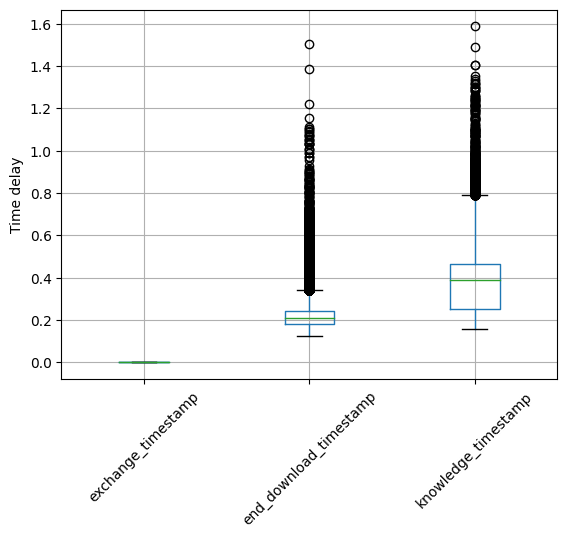

In [15]:
time_delays = obccexqu.get_time_delay_between_events(time)
time_delays.boxplot(rot=45, ylabel="Time delay")

In [16]:
time_delays[time_delays["end_download_timestamp"] > 0.3]

,exchange_timestamp,end_download_timestamp,knowledge_timestamp
timestamp,,,
1700211724162,0.0,0.333148,0.379776
1700211724563,0.0,0.356891,0.381851
1700211725251,0.0,0.502273,0.549816
1700211725274,0.0,0.478344,0.526816
1700211725285,0.0,0.464142,0.515816
...,...,...,...
1700212918797,0.0,0.337944,0.370817
1700212919001,0.0,0.339753,0.563301
1700212919027,0.0,0.305003,0.537301


In [17]:
# Get duplicates per asset
subset_columns = df.columns.difference(
    [
        "end_download_timestamp",
        "knowledge_timestamp",
        "currency_pair",
    ]
)
duplicates_count = (
    df.groupby(["currency_pair"] + list(subset_columns))
    .size()
    .reset_index(name="count")
)

In [18]:
duplicate_rows = duplicates_count[duplicates_count["count"] > 1]

In [19]:
duplicate_rows.groupby("currency_pair")["count"].count()

Series([], Name: count, dtype: int64)

In [20]:
duplicate_groups = df.groupby(["currency_pair"] + list(subset_columns))
limit = 10
for (row, group) in duplicate_groups:
    if limit == 0:
        break
    if len(group) > 1:
        print(group.head())
        limit -= 1